In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


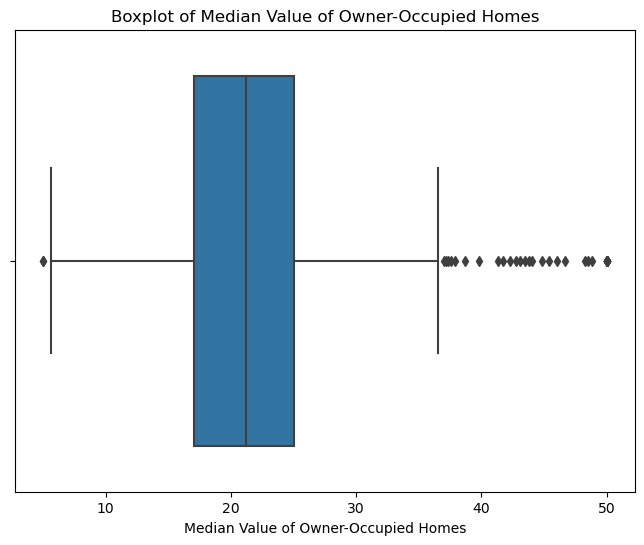

In [7]:
# For the "Median value of owner-occupied homes" provide a boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes')
plt.show()

Boxplot of Median Value of Owner-Occupied Homes shows the distribution of the median value of owner-occupied homes in the dataset. It will help you observe the central tendency, spread, and any potential outliers in the MEDV variable.

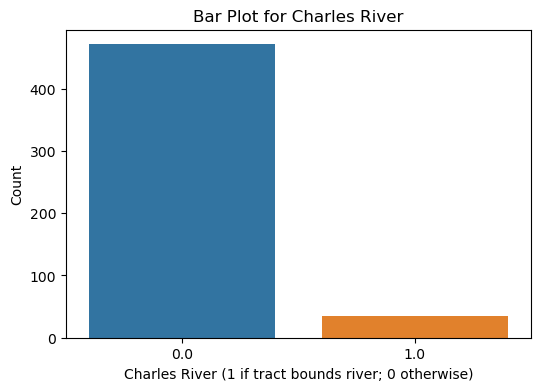

In [8]:
# Provide a bar plot for the Charles River variable
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River')
plt.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()


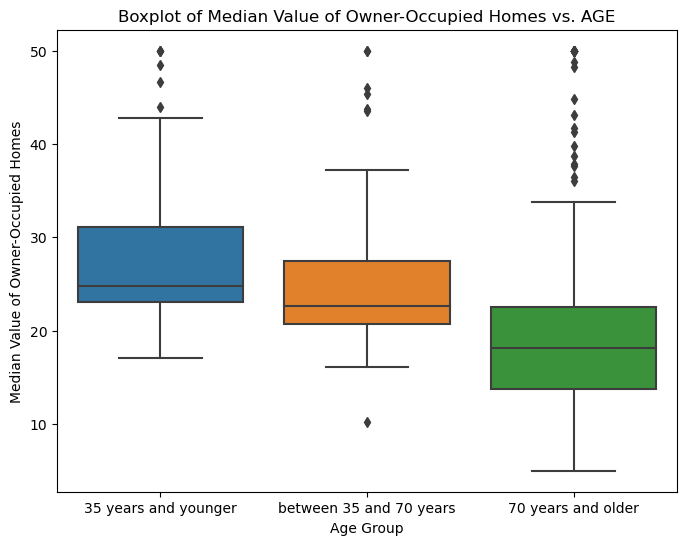

In [11]:
# Provide a boxplot for the MEDV variable vs the AGE variable.(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older))
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')],
                         labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Provide a boxplot for the MEDV variable vs the AGE variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes vs. AGE')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.show()


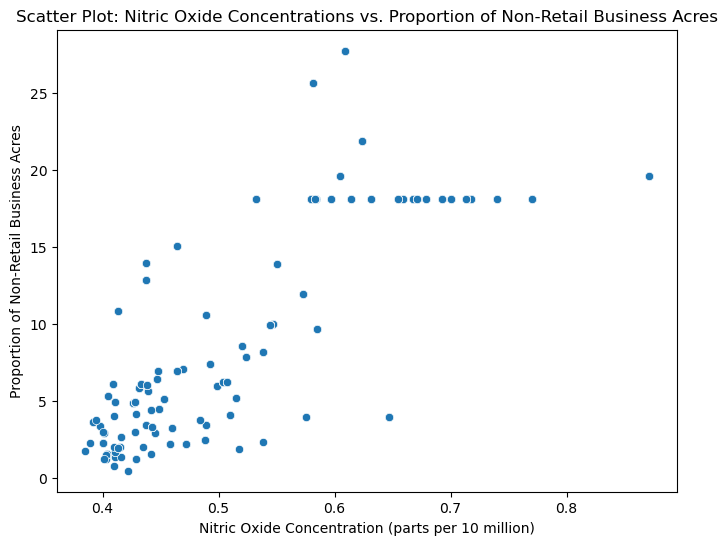

In [12]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot: Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

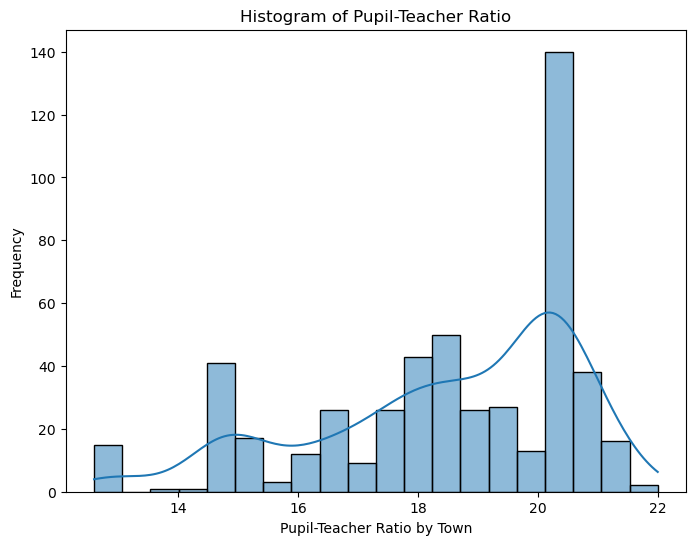

In [13]:
# Create a histogram for the pupil-teacher ratio variable

plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.

In [14]:
!pip install scipy statsmodels

In [15]:
from scipy.stats import ttest_ind

Hypothesis:

* Null Hypothesis (H0): There is no significant difference in median values of houses bounded by the Charles River.
* Alternative Hypothesis (H1): There is a significant difference in median values of houses bounded by the Charles River.

In [22]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Separate data for houses bounded and not bounded by Charles River
houses_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
houses_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test for independent samples
t_statistic, p_value = ttest_ind(houses_bounded, houses_not_bounded)

# Check the significance level (alpha) you want to use
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print("There is a significant difference in median values of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles River.")

There is a significant difference in median values of houses bounded by the Charles River.


In [23]:
from scipy.stats import f_oneway

Hypothesis:

* Null Hypothesis (H0): There is no significant difference in median values of houses for different age groups.
* Alternative Hypothesis (H1): There is a significant difference in median values of houses for different age groups.

In [24]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Perform the one-way ANOVA test
result = f_oneway(
    boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'],
    boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']
)

# Check the significance level (alpha) you want to use
alpha = 0.05

# Interpret the result
if result.pvalue < alpha:
    print("There is a significant difference in median values of houses for different age groups.")
else:
    print("There is no significant difference in median values of houses for different age groups.")



There is a significant difference in median values of houses for different age groups.


In [25]:
from scipy.stats import pearsonr

Hypothesis:

* Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [26]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Check the significance level (alpha) you want to use
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [27]:
import statsmodels.api as sm

Hypothesis:

* Null Hypothesis (H0): The weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes.
* Alternative Hypothesis (H1): The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.

In [28]:
# Separate independent and dependent variables
X = boston_df['DIS']  # Weighted distances to five Boston employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant term to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# State the conclusion from the test
if model.pvalues['DIS'] < alpha:
    print("Reject the Null Hypothesis (H0). There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")

Reject the Null Hypothesis (H0). There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
